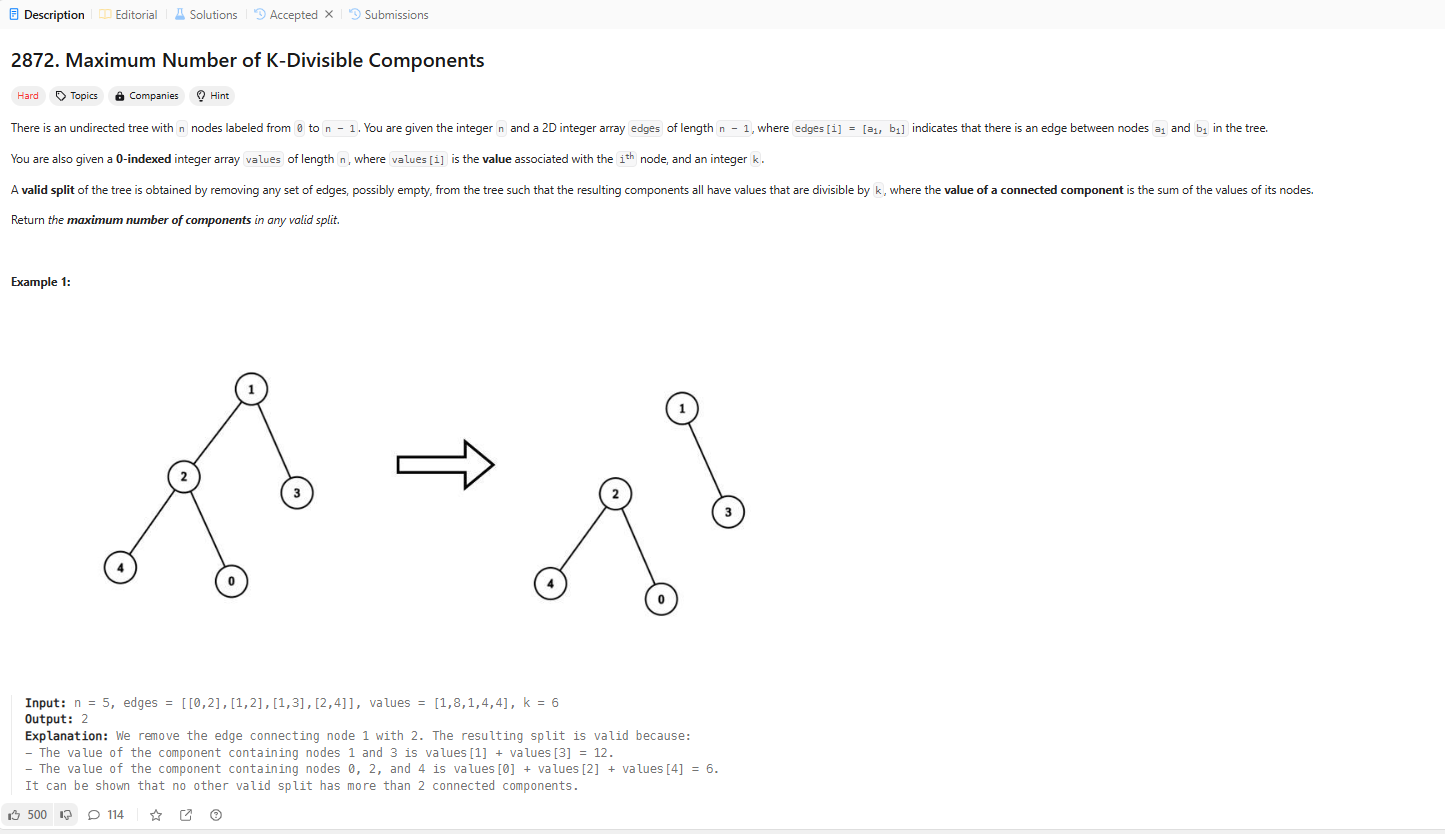

#### Solution 1 in python


In [ ]:
class Solution:
    def __init__(self):
        self.cnt = 0

    def getSubtree(self, node, adj, parent, subtree):
        if len(adj[node]) == 1 and adj[node][0] == parent:
            return
        for neighbor in adj[node]:
            if neighbor != parent:
                self.getSubtree(neighbor, adj, node, subtree)
                subtree[node] += subtree[neighbor]

    def dfs(self, node, adj, parent, subtree, k):
        if len(adj[node]) == 1 and adj[node][0] == parent:
            return
        for neighbor in adj[node]:
            if neighbor != parent:
                parSubtree = subtree[node] - subtree[neighbor]
                childSubtree = subtree[neighbor]
                if parSubtree % k == 0 and childSubtree % k == 0:
                    self.cnt += 1
                    subtree[node] -= subtree[neighbor]
                else:
                    subtree[neighbor] = subtree[node]
                self.dfs(neighbor, adj, node, subtree, k)

    def maxKDivisibleComponents(self, n, edges, values, k):
        adj = [[] for _ in range(n + 1)]
        for u, v in edges:
            adj[u].append(v)
            adj[v].append(u)

        subtree = [val for val in values]
        self.getSubtree(0, adj, -1, subtree)
        self.dfs(0, adj, -1, subtree, k)
        return self.cnt + 1